# Project Group 16

Members: Jurian Fijen, Quirine Japikse, Christos Paschalidis, Kristian Terlien, Timo Locher

Student numbers: 

# Research Objective

*Requires data modeling and quantitative research in Transport, Infrastructure & Logistics*

# Contribution Statement

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

**Author 1**: Jurian Fijen

**Author 2**: Quirine Japikse

**Author 3**: Christos Paschalidis

**Author 4**: Kristian Terlien

**Author 5**: Timo Locher

# Data Used

Research question: What is the effect of the population density of a municipality on the first and last mile transport of their NS stations?

The plan is to combine first- and last-mile transport data with CBS data concerning the built environment of the train station surroundings. Cumbersome first- and last-mile transport can be an inhibition in choosing public transport. The goal is to obtain a better understanding of these factors in multi-modal trips. Data sources are NS, CBS and ODiN. The plan is to choose data from a specific year (probably 2019) and only within The Netherlands NS train stations.

Data sources:
https://dashboards.nsjaarverslag.nl/reizigersgedrag/
https://opendata.cbs.nl/statline/#/CBS/nl/

# Data Pipeline

# Load Libraries

In [2]:
import pandas as pd
import requests
import time
import plotly.express as px
import numpy as np
from bs4 import BeautifulSoup
from selenium import webdriver  
from selenium.common.exceptions import NoSuchElementException  
from selenium.webdriver.common.keys import Keys  

# Data Import / Filtering

### NS Data

In [19]:
def read_ns_data(station:str,year:str):
    """
    Input: NS station and year
    Method: Use Selenium which uses local browser to load a webpage
    Reason: NS page is dynamic (not static) therefore the page loads in several phases (Due to animations)
    Output: Statistics for the input station and year

    """
    URL = "https://dashboards.nsjaarverslag.nl/reizigersgedrag/" + station +"?dtYear=" + year
    browser = webdriver.Safari()  
    browser.get(URL)  
    time.sleep(3)
    html_source = browser.page_source  
    browser.quit()
    soup = BeautifulSoup(html_source,'html.parser')  
    results = soup.find(id="content")
    kpi_value_containers = soup.find_all(class_='db-kpi_value-container')

    # Initialize a dictionary to store the extracted values
    kpi_values = {}

    # Iterate through the value containers
    for container in kpi_value_containers:
        # Find the associated title (assuming it's in the parent div)
        title = container.find_previous(class_='db-kpi_title').text.strip()

        # Extract the value (assumes it's within a <span> element)
        value_element = container.find('span', class_='db-kpi_value')
        value = value_element.text.strip()

        # Check if the title is already in the dictionary
        if title in kpi_values:
            # If it is, append the value to the existing list
            kpi_values[title].append(value)
        else:
            # If it's not, create a new list with the value
            kpi_values[title] = [value]
            
    # create data for dataframe
    data ={}
    for title, value in kpi_values.items():
        if len(value) == 2:
            data[title + '_voor'] = value[0]
            data[title + '_na'] = value[1]
        else:
            data[title] = value

    df = pd.DataFrame(data)
    df.index = pd.MultiIndex.from_tuples([(station, year)], names=['Station', 'Year'])
    return df

In [6]:
# test function
read_ns_data('delft','2019')

InvalidSessionIdException: Message: 


In [7]:
ns_stations = ['alphen-aan-den-rijn','barendrecht','bodegraven','boskoop','boskoop-snijdelwijk','capelle-schollevaar',
               'de-vink','delft','delft-campus','den-haag-centraal','den-haag-hs','den-haag-laan-van-noi','den-haag-mariahoeve',
               'den-haag-moerwijk','den-haag-ypenburg','dordrecht','dordrecht-zuid','gouda','gouda-goverwelle','hillegom',
               'lansingerland-zoetermeer','leiden-centraal','leiden-lammenschans','nieuwerkerk-a-d-ijssel','rijswijk',
               'rotterdam-alexander','rotterdam-blaak','rotterdam-centraal','rotterdam-lombardijen','rotterdam-noord',
               'rotterdam-zuid','sassenheim','schiedam-centrum','voorburg','voorhout','voorschoten','waddinxveen','waddinxveen-noord',
               'waddinxveen-triangel','zoetermeer','zoetermeer-oost','zwijndrecht'
              ]
years = ['2019','2020','2021','2022']

#### Create dataframe for all stations,years

In [2]:
# Create Dataframe
"""
Don't run it, just import the csv file!!!
"""

df_ns_data = pd.DataFrame()
# Loop through stations and years
for station in ns_stations:
    for year in years:
        # Call the read_ns_data function
        df = read_ns_data(station, year)
        
        # Concatenate the obtained DataFrame with the final_df
        df_ns_data = pd.concat([df_ns_data, df])
df_ns_data.to_csv('unfiltered_ns_data.csv') # save dataset to csv

NameError: name 'ns_stations' is not defined

In [ ]:
# Filter Dataframe
"""
Don't run it, just import the csv file!!!
"""

df_ns = pd.read_csv('unfiltered_ns_data.csv',dtype={'Reizigers per dag': str,'In- en uitstappers':str,'Overstappers':str}) # load the csv

# Account for passenger values over 1000 which are displayed with a dot
def multiply_by_1000(value):
    if '.' in value:
        return int( float(value) * 1000 )
    else:
        return value
# 'In- en uitstappers','Overstappers'
df_ns['Reizigers per dag'] = df_ns['Reizigers per dag'].apply(multiply_by_1000)
df_ns['In- en uitstappers'] = df_ns['In- en uitstappers'].apply(multiply_by_1000)
df_ns['Overstappers'] = df_ns['Overstappers'].apply(multiply_by_1000)

#df_ns.to_csv('df_ns.csv') #save dataframe


# df_ns dataframe is now ready to use

# RUN THIS CELL BELOW FOR THE DATASET

In [3]:
df_ns = pd.read_csv('ns_data.csv') # Run this instead

#### Dataframe is now ready to use

In [4]:
# extract data for a specific station on a specific year
df_ns[(df_ns['Station'] == 'alphen-aan-den-rijn') & (df_ns['Year'] == 2019)]

,Station,Year,Reizigers per dag,Klantoordeel,In- en uitstappers,Overstappers,Ochtendspits,Avondspits,Daluren,Lopend_voor,...,Fiets_voor,Fiets_na,Bus/tram/metro_voor,Bus/tram/metro_na,Auto (bestuurder)_voor,Auto (bestuurder)_na,Auto (passagier)_voor,Auto (passagier)_na,(Deel)taxi_voor,(Deel)taxi_na
0,alphen-aan-den-rijn,2019,12.63,72%,10.996,1.634,32%,13%,55%,23%,...,48%,24%,17%,17%,8%,2%,4%,11%,0%,0%


In [5]:
# extract data for a specific year
df_new = df_ns[df_ns['Year'] == 2019]
df_new.head()

,Station,Year,Reizigers per dag,Klantoordeel,In- en uitstappers,Overstappers,Ochtendspits,Avondspits,Daluren,Lopend_voor,...,Fiets_voor,Fiets_na,Bus/tram/metro_voor,Bus/tram/metro_na,Auto (bestuurder)_voor,Auto (bestuurder)_na,Auto (passagier)_voor,Auto (passagier)_na,(Deel)taxi_voor,(Deel)taxi_na
0,alphen-aan-den-rijn,2019,12.630,72%,10.996,1.634,32%,13%,55%,23%,...,48%,24%,17%,17%,8%,2%,4%,11%,0%,0%
4,barendrecht,2019,6.066,79%,6.066,0.000,33%,12%,55%,21%,...,34%,22%,4%,8%,28%,6%,13%,24%,0%,0%
8,bodegraven,2019,3.448,68%,3.448,0.000,37%,10%,53%,36%,...,42%,25%,1%,2%,16%,4%,5%,18%,0%,0%
12,boskoop,2019,1.432,78%,1.432,0.000,33%,9%,58%,29%,...,58%,27%,0%,7%,6%,3%,6%,9%,1%,0%
16,boskoop-snijdelwijk,2019,667.000,92%,667.000,0.000,35%,7%,58%,0%,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%


### Population density calculation ###
To obtain an estimation of the population density around a train station, the population density for the postal codes in and around the stations is calculated.

In [6]:
#necessary datasets


postcodes = pd.read_csv('postal_codes_data_final.csv')
postcode_array = postcodes['postcode'].to_numpy()

#create an array for the area in the right unit
area_m2 = postcodes['oppervlakte'].to_numpy()
area_km2 = area_m2 *10e-06

#create an array for the number of inhabitants and calculate population density
inhabitants = postcodes['aantal_inwoners'].to_numpy()
pop_density = inhabitants / area_km2

postcode_density = np.c_[postcode_array, pop_density]

#create postcode population density dictionary
pp_dict = dict(zip(postcode_array,pop_density))

In [7]:
stations = pd.read_csv('NS_stations_met_aangrenzende_postcodes.csv', delimiter = ',')
stations

#add the population density data for zone0
postcode_gebied_station_arr = stations['postcode_gebied_station'].to_numpy()

#create array with populetion density zone 0
pop_dens_zone0 = np.zeros(len(postcode_gebied_station_arr))
for i in range(len(postcode_gebied_station_arr)):
    pop_dens_zone0[i] = pp_dict[postcode_gebied_station_arr[i]]
    
#add to dataframe
stations['pop_density_zone0'] = pop_dens_zone0
stations


#calculate population density for zone1
zone1_arr = stations['postcode_aangrenzende_postcode_gebieden'].to_numpy()

#split strings into lists
for i in range(len(zone1_arr)):
    zone1_arr[i] = zone1_arr[i].split(',') 

#create array with population density for zone1
pop_dens_zone1 = np.zeros(len(zone1_arr))

#calculate average pop dens of postal codes
for j in range(len(zone1_arr)):
    sum_pop_dens = 0
    for i in range(len(zone1_arr[j])):    
        sum_pop_dens += pp_dict[int(zone1_arr[j][i])]
    avg_pop_dens = sum_pop_dens/len(zone1_arr[j])
    pop_dens_zone1[j] = avg_pop_dens

#add to dataframe
stations['pop_density_zone1'] = pop_dens_zone1
stations.to_csv('population_densities.csv')
stations

,station_naam,postcode_gebied_station,postcode_aangrenzende_postcode_gebieden,pop_density_zone0,pop_density_zone1
0,'t-harde,8084,"[8072, 8081, 8084, 8085, 8096, 8162]",28.675240,40.251723
1,helmond-'t-hout,5707,"[5673, 5674, 5701, 5702, 5706, 5707, 5708, 573...",140.713961,194.702712
2,abcoude,1391,"[1105, 1106, 1107, 1108, 1109, 1191, 1383, 139...",33.988684,131.058002
3,akkrum,8491,"[9001, 8467, 8468, 8491, 8493, 8494, 8495, 9011]",28.227843,12.540703
4,alkmaar,1815,"[1811, 1814, 1815, 1816, 1817, 1823, 1824, 1851]",424.124882,438.229208
...,...,...,...,...,...
245,zoetermeer-oost,2712,"[2719, 2665, 2711, 2712, 2713, 2718, 2722]",252.749370,383.649670
246,utrecht-zuilen,3551,"[3532, 3513, 3534, 3551, 3552, 3553]",1040.205826,932.222619
247,zutphen,7201,"[7201, 7202, 7203, 7204, 7205, 7206]",424.826342,247.983724
248,zwijndrecht,3331,"[3335, 3311, 3316, 3331, 3332, 3333, 3336, 334...",507.309600,312.804719


In [8]:
df_ns_2019 = df_ns[df_ns['Year'] == 2019]
df_ns_2019

,Station,Year,Reizigers per dag,Klantoordeel,In- en uitstappers,Overstappers,Ochtendspits,Avondspits,Daluren,Lopend_voor,...,Fiets_voor,Fiets_na,Bus/tram/metro_voor,Bus/tram/metro_na,Auto (bestuurder)_voor,Auto (bestuurder)_na,Auto (passagier)_voor,Auto (passagier)_na,(Deel)taxi_voor,(Deel)taxi_na
0,alphen-aan-den-rijn,2019,12.630,72%,10.996,1.634,32%,13%,55%,23%,...,48%,24%,17%,17%,8%,2%,4%,11%,0%,0%
4,barendrecht,2019,6.066,79%,6.066,0.000,33%,12%,55%,21%,...,34%,22%,4%,8%,28%,6%,13%,24%,0%,0%
8,bodegraven,2019,3.448,68%,3.448,0.000,37%,10%,53%,36%,...,42%,25%,1%,2%,16%,4%,5%,18%,0%,0%
12,boskoop,2019,1.432,78%,1.432,0.000,33%,9%,58%,29%,...,58%,27%,0%,7%,6%,3%,6%,9%,1%,0%
16,boskoop-snijdelwijk,2019,667.000,92%,667.000,0.000,35%,7%,58%,0%,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
20,capelle-schollevaar,2019,2.466,52%,2.466,0.000,32%,13%,55%,60%,...,18%,16%,3%,3%,16%,3%,3%,6%,0%,0%
24,de-vink,2019,3.408,71%,3.408,0.000,41%,6%,53%,46%,...,41%,24%,1%,8%,9%,9%,3%,4%,0%,0%
28,delft,2019,40.818,92%,40.435,383.000,22%,19%,59%,27%,...,53%,37%,17%,21%,1%,1%,2%,3%,0%,0%
32,delft-campus,2019,4.719,47%,4.719,0.000,24%,23%,53%,36%,...,44%,34%,1%,1%,15%,4%,4%,6%,0%,0%
36,den-haag-centraal,2019,104.747,86%,98.818,5.929,14%,28%,58%,24%,...,22%,7%,52%,33%,0%,0%,2%,1%,0%,0%


In [10]:
df_ns_delft_2019 = df_ns_2019[df_ns_2019['Station'] == 'delft']

df_ns_delft_2019

,Station,Year,Reizigers per dag,Klantoordeel,In- en uitstappers,Overstappers,Ochtendspits,Avondspits,Daluren,Lopend_voor,...,Fiets_voor,Fiets_na,Bus/tram/metro_voor,Bus/tram/metro_na,Auto (bestuurder)_voor,Auto (bestuurder)_na,Auto (passagier)_voor,Auto (passagier)_na,(Deel)taxi_voor,(Deel)taxi_na
28,delft,2019,40.818,92%,40.435,383.0,22%,19%,59%,27%,...,53%,37%,17%,21%,1%,1%,2%,3%,0%,0%


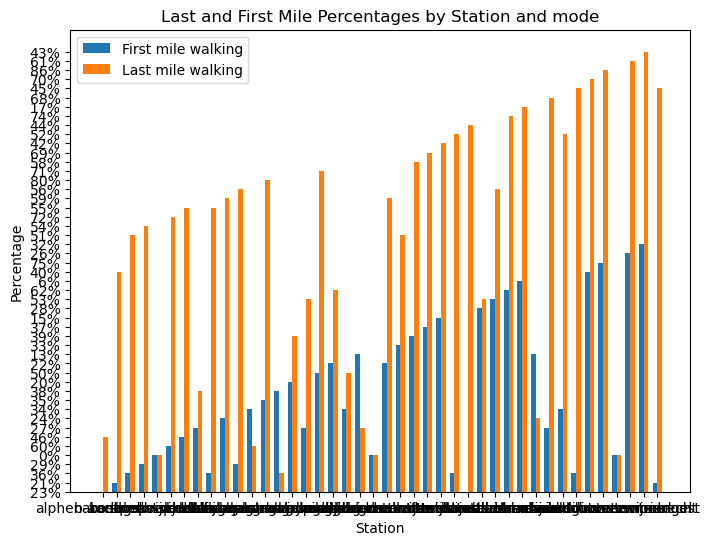

In [11]:
import matplotlib.pyplot as plt
import pandas as pd


# Create a grouped bar chart
plt.figure(figsize=(8, 6))

bar_width = 0.35
index = range(len(df_ns_2019))

plt.bar(index, df_ns_2019['Lopend_voor'], bar_width, label='First mile walking')
plt.bar([i + bar_width for i in index], df_ns_2019['Lopend_na'], bar_width, label='Last mile walking')

plt.xlabel('Station')
plt.ylabel('Percentage')
plt.title('Last and First Mile Percentages by Station and mode' )
plt.xticks([i + bar_width / 2 for i in index], df_ns_2019['Station'])
plt.legend()

plt.show()


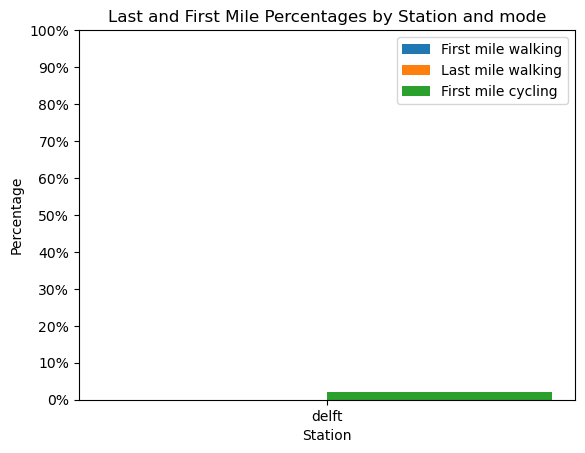

In [12]:


bar_width = 0.35
index = range(len(df_ns_delft_2019))

plt.bar(index, df_ns_delft_2019['Lopend_voor'], bar_width, label='First mile walking')
plt.bar([i + bar_width for i in index], df_ns_delft_2019['Lopend_na'], bar_width, label='Last mile walking')
plt.bar([i + bar_width for i in index], df_ns_delft_2019['Fiets_voor'], bar_width, label='First mile cycling')

plt.xlabel('Station')
plt.ylabel('Percentage')
plt.title('Last and First Mile Percentages by Station and mode')
plt.xticks([i + bar_width / 2 for i in index], df_ns_delft_2019['Station'])
plt.legend()

plt.ylim(0, 100)
plt.yticks(range(0, 101, 10), [f"{i}%" for i in range(0, 101, 10)])

plt.show()


In [13]:
df_ns_delft_2019.iloc[:, [9,10,11,12,13,14,15,16,17,18,19,20]]

,Lopend_voor,Lopend_na,Fiets_voor,Fiets_na,Bus/tram/metro_voor,Bus/tram/metro_na,Auto (bestuurder)_voor,Auto (bestuurder)_na,Auto (passagier)_voor,Auto (passagier)_na,(Deel)taxi_voor,(Deel)taxi_na
28,27%,38%,53%,37%,17%,21%,1%,1%,2%,3%,0%,0%


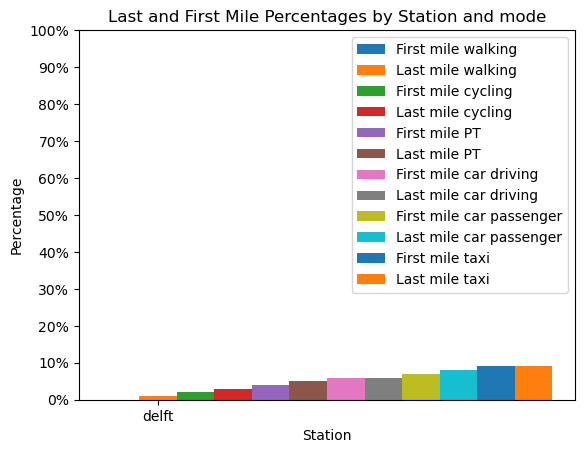

In [15]:
bar_width = 0.25  # Adjust the bar width and spacing as needed
index = range(len(df_ns_delft_2019))

# Plot the bars for "First mile walking"
plt.bar(index, df_ns_delft_2019['Lopend_voor'], bar_width, label='First mile walking')

# Increment the index for the next set of bars
index = [i + bar_width for i in index]

# Plot the bars for "Last mile walking"
plt.bar(index, df_ns_delft_2019['Lopend_na'], bar_width, label='Last mile walking')

# Increment the index for the next set of bars
index = [i + bar_width for i in index]

# Plot the bars for "First mile cycling"
plt.bar(index, df_ns_delft_2019['Fiets_voor'], bar_width, label='First mile cycling')

# Increment the index for the next set of bars
index = [i + bar_width for i in index]

# Plot the bars for "First mile cycling"
plt.bar(index, df_ns_delft_2019['Fiets_na'], bar_width, label='Last mile cycling')

# Increment the index for the next set of bars
index = [i + bar_width for i in index]

# Plot the bars for "First mile cycling"
plt.bar(index, df_ns_delft_2019['Bus/tram/metro_voor'], bar_width, label='First mile PT')

# Increment the index for the next set of bars
index = [i + bar_width for i in index]

# Plot the bars for "First mile cycling"
plt.bar(index, df_ns_delft_2019['Bus/tram/metro_na'], bar_width, label='Last mile PT')

# Increment the index for the next set of bars
index = [i + bar_width for i in index]

# Plot the bars for "First mile cycling"
plt.bar(index, df_ns_delft_2019['Auto (bestuurder)_voor'], bar_width, label='First mile car driving')

# Increment the index for the next set of bars
index = [i + bar_width for i in index]

# Plot the bars for "First mile cycling"
plt.bar(index, df_ns_delft_2019['Auto (bestuurder)_na'], bar_width, label='Last mile car driving')

# Increment the index for the next set of bars
index = [i + bar_width for i in index]

# Plot the bars for "First mile cycling"
plt.bar(index, df_ns_delft_2019['Auto (passagier)_voor'], bar_width, label='First mile car passenger')

# Increment the index for the next set of bars
index = [i + bar_width for i in index]

# Plot the bars for "First mile cycling"
plt.bar(index, df_ns_delft_2019['Auto (passagier)_na'], bar_width, label='Last mile car passenger')

# Increment the index for the next set of bars
index = [i + bar_width for i in index]

# Plot the bars for "First mile cycling"
plt.bar(index, df_ns_delft_2019['(Deel)taxi_voor'], bar_width, label='First mile taxi')

# Increment the index for the next set of bars
index = [i + bar_width for i in index]

# Plot the bars for "First mile cycling"
plt.bar(index, df_ns_delft_2019['(Deel)taxi_na'], bar_width, label='Last mile taxi')

plt.xlabel('Station')
plt.ylabel('Percentage')
plt.title('Last and First Mile Percentages by Station and mode')
plt.xticks([i + bar_width for i in range(len(df_ns_delft_2019))], df_ns_delft_2019['Station'])
plt.legend()

plt.ylim(0, 100)
plt.yticks(range(0, 101, 10), [f"{i}%" for i in range(0, 101, 10)])

plt.show()

In [16]:
index = range(len(df_ns_delft_2019))
data_types = df_ns_2019.applymap(type)
print(data_types)
print(index)

           Station           Year Reizigers per dag   Klantoordeel  \
0    <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
4    <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
8    <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
12   <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
16   <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
20   <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
24   <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
28   <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
32   <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
36   <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
40   <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
44   <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
48   <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
52   <class 'str'>  

In [19]:
df_copy_ns_2019 = df_ns_2019.copy()

df_copy_ns_2019['Lopend_voor'] = df_ns_2019['Lopend_voor'].str.rstrip('%').astype(float) / 100
df_copy_ns_2019['Lopend_na'] = df_ns_2019['Lopend_na'].str.rstrip('%').astype(float) / 100
df_copy_ns_2019['Fiets_voor'] = df_ns_2019['Fiets_voor'].str.rstrip('%').astype(float) / 100
df_copy_ns_2019['Fiets_na'] = df_ns_2019['Fiets_na'].str.rstrip('%').astype(float)/ 100
df_copy_ns_2019['Bus/tram/metro_voor'] = df_ns_2019['Bus/tram/metro_voor'].str.rstrip('%').astype(float)/100
df_copy_ns_2019['Bus/tram/metro_na'] = df_ns_2019['Bus/tram/metro_na'].str.rstrip('%').astype(float) / 100
df_copy_ns_2019['Auto (bestuurder)_voor'] = df_ns_2019['Auto (bestuurder)_voor'].str.rstrip('%').astype(float) /100
df_copy_ns_2019['Auto (bestuurder)_na'] = df_ns_2019['Auto (bestuurder)_na'].str.rstrip('%').astype(float) /100
df_copy_ns_2019['Auto (passagier)_voor'] = df_ns_2019['Auto (passagier)_voor'].str.rstrip('%').astype(float) / 100
df_copy_ns_2019['Auto (passagier)_na'] = df_ns_2019['Auto (passagier)_na'].str.rstrip('%').astype(float) / 100
df_copy_ns_2019['(Deel)taxi_voor'] = df_ns_2019['(Deel)taxi_voor'].str.rstrip('%').astype(float) / 100
df_copy_ns_2019['(Deel)taxi_na'] = df_ns_2019['(Deel)taxi_na'].str.rstrip('%').astype(float)/ 100

data_types = df_copy_ns_2019.applymap(type)
print(data_types)

           Station           Year Reizigers per dag   Klantoordeel  \
0    <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
4    <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
8    <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
12   <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
16   <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
20   <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
24   <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
28   <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
32   <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
36   <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
40   <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
44   <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
48   <class 'str'>  <class 'int'>   <class 'float'>  <class 'str'>   
52   <class 'str'>  

In [37]:
df_copy_ns_2019

,Station,Year,Reizigers per dag,Klantoordeel,In- en uitstappers,Overstappers,Ochtendspits,Avondspits,Daluren,Lopend_voor,...,Fiets_voor,Fiets_na,Bus/tram/metro_voor,Bus/tram/metro_na,Auto (bestuurder)_voor,Auto (bestuurder)_na,Auto (passagier)_voor,Auto (passagier)_na,(Deel)taxi_voor,(Deel)taxi_na
0,alphen-aan-den-rijn,2019,12.630,72%,10.996,1.634,32%,13%,55%,0.23,...,0.48,0.24,0.17,0.17,0.08,0.02,0.04,0.11,0.00,0.0
4,barendrecht,2019,6.066,79%,6.066,0.000,33%,12%,55%,0.21,...,0.34,0.22,0.04,0.08,0.28,0.06,0.13,0.24,0.00,0.0
8,bodegraven,2019,3.448,68%,3.448,0.000,37%,10%,53%,0.36,...,0.42,0.25,0.01,0.02,0.16,0.04,0.05,0.18,0.00,0.0
12,boskoop,2019,1.432,78%,1.432,0.000,33%,9%,58%,0.29,...,0.58,0.27,0.00,0.07,0.06,0.03,0.06,0.09,0.01,0.0
16,boskoop-snijdelwijk,2019,667.000,92%,667.000,0.000,35%,7%,58%,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
20,capelle-schollevaar,2019,2.466,52%,2.466,0.000,32%,13%,55%,0.60,...,0.18,0.16,0.03,0.03,0.16,0.03,0.03,0.06,0.00,0.0
24,de-vink,2019,3.408,71%,3.408,0.000,41%,6%,53%,0.46,...,0.41,0.24,0.01,0.08,0.09,0.09,0.03,0.04,0.00,0.0
28,delft,2019,40.818,92%,40.435,383.000,22%,19%,59%,0.27,...,0.53,0.37,0.17,0.21,0.01,0.01,0.02,0.03,0.00,0.0
32,delft-campus,2019,4.719,47%,4.719,0.000,24%,23%,53%,0.36,...,0.44,0.34,0.01,0.01,0.15,0.04,0.04,0.06,0.00,0.0
36,den-haag-centraal,2019,104.747,86%,98.818,5.929,14%,28%,58%,0.24,...,0.22,0.07,0.52,0.33,0.00,0.00,0.02,0.01,0.00,0.0


In [48]:
# Create a grouped bar chart using Plotly
df_copy_ns_2019_delft = df_copy_ns_2019[df_copy_ns_2019['Station'] == 'delft']

fig = px.bar(df_copy_ns_2019_delft, x='Station', y=['Lopend_voor', 'Lopend_na','Fiets_voor', 'Fiets_na', 'Bus/tram/metro_voor', 'Bus/tram/metro_na', 'Auto (bestuurder)_voor', 'Auto (bestuurder)_na', 'Auto (passagier)_voor', 'Auto (passagier)_na', '(Deel)taxi_voor', '(Deel)taxi_na'], barmode='group')

# Update text labels
fig.update_traces(
    texttemplate='%{value:.0%}',
    textposition='outside'
)


fig.update_layout(
    xaxis_title='Station',
    yaxis_title='Percentage',
    yaxis_tickformat='.0%',
    title='Last and First Mile Percentages by Station and Mode'
)

fig.show()

In [38]:
df_copy_ns_2019_delft

,Station,Year,Reizigers per dag,Klantoordeel,In- en uitstappers,Overstappers,Ochtendspits,Avondspits,Daluren,Lopend_voor,...,Fiets_voor,Fiets_na,Bus/tram/metro_voor,Bus/tram/metro_na,Auto (bestuurder)_voor,Auto (bestuurder)_na,Auto (passagier)_voor,Auto (passagier)_na,(Deel)taxi_voor,(Deel)taxi_na
28,delft,2019,40.818,92%,40.435,383.0,22%,19%,59%,0.27,...,0.53,0.37,0.17,0.21,0.01,0.01,0.02,0.03,0.0,0.0
